In [6]:
# 60
## 同一ディレクトリ内にhttps://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g からダウンロードした学習済み単語ベクトルを配置しているものとする

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from gensim.models import KeyedVectors

DATASETPATH = '{filepath}' 

wv = KeyedVectors.load_word2vec_format(DATASETPATH, binary=True)

print(wv['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

In [ ]:
# 61

print(wv.similarity('United_States', 'U.S.'))

0.73107743


In [ ]:
# 62

united_similars = wv.similar_by_word("United_States", topn=10)

for similar in united_similars:
  print(similar)

('Unites_States', 0.7877248525619507)
('Untied_States', 0.7541370391845703)
('United_Sates', 0.74007248878479)
('U.S.', 0.7310774326324463)
('theUnited_States', 0.6404393911361694)
('America', 0.6178410053253174)
('UnitedStates', 0.6167312264442444)
('Europe', 0.6132988929748535)
('countries', 0.6044804453849792)
('Canada', 0.6019070148468018)


In [ ]:
# 63

diff_v = wv['Spain'] - wv['Madrid'] + wv['Athens'] 

similars = wv.similar_by_vector(diff_v, topn=10)

for similar in similars:
  print(similar)

('Athens', 0.7528455853462219)
('Greece', 0.6685472726821899)
('Aristeidis_Grigoriadis', 0.5495778322219849)
('Ioannis_Drymonakos', 0.5361456871032715)
('Greeks', 0.5351786613464355)
('Ioannis_Christou', 0.5330226421356201)
('Hrysopiyi_Devetzi', 0.5088489055633545)
('Iraklion', 0.5059264898300171)
('Greek', 0.5040615797042847)
('Athens_Greece', 0.5034109354019165)


In [2]:
# 64

!wget http://download.tensorflow.org/data/questions-words.txt

--2023-01-23 14:43:43--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.145.128, 2a00:1450:4013:c14::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.145.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2023-01-23 14:43:44 (254 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [4]:
import csv

categories = []
with open('/content/questions-words.txt', mode='r') as f:  # ファイル分割
  valid_data = csv.reader(f, delimiter=' ')
  filename = ""
  for row in valid_data:
    if ':' in row:
      filename = 'questions-words-{}.txt'.format(row[1]) 
      categories.append(row[1])
    with open('/content/{}'.format(filename), mode='a') as f:
      writer = csv.writer(f, delimiter=' ')
      writer.writerow(row)

In [8]:
from gensim.models import KeyedVectors

DATASETPATH = '{filepath}' 

wv = KeyedVectors.load_word2vec_format(DATASETPATH, binary=True) 



In [ ]:
import csv


def calculate_per_categories(category):
  with open('/content/questions-words-{}.txt'.format(category), mode='r') as f: 
    valid_data = csv.reader(f, delimiter=' ')
    next(valid_data)
    for row in valid_data:
      word1, word2, word3 = row[:3]
      vect1 = wv[word1]
      vect2 = wv[word2]
      vect3 = wv[word3]
      diff_v = vect2 - vect1 + vect3
      similar = wv.most_similar(positive=[diff_v], topn=1)[0]
      with open('/content/questions-words-{}-with-similar'.format(category), mode='a') as f:
        writer = csv.writer(f, delimiter=' ')
        writer.writerow(row + list(similar))
    print(f'{category} finished') 


In [ ]:
calculate_per_categories('capital-common-countries')

capital-common-countries finished


In [ ]:
for category in categories[1:]:
  calculate_per_categories(category)

capital-world finished
currency finished
city-in-state finished
family finished
gram1-adjective-to-adverb finished
gram2-opposite finished
gram3-comparative finished
gram4-superlative finished
gram5-present-participle finished
gram6-nationality-adjective finished
gram7-past-tense finished
gram8-plural finished
gram9-plural-verbs finished


In [ ]:
# 65
sum_semantics = 0
sum_syntactics = 0
correct_semantics = 0
correct_syntactics = 0

for category in categories:
  with open('/content/questions-words-{}-with-similar'.format(category), mode='r') as f: 
    valid_data = csv.reader(f, delimiter=' ')
    for row in valid_data:
      if 'gram' in category:
        sum_syntactics += 1
        if row[-2] == row[-3]:
          correct_syntactics += 1
      else:
        sum_semantics += 1
        if row[-2] == row[-3]:
          correct_semantics += 1

print('Semantic Analogy: {} %'.format(correct_semantics * 100 / sum_semantics))
print('Syntactic Analogy: {} %'.format(correct_syntactics * 100 / sum_syntactics))

Semantic Analogy: 17.352576389671892 %
Syntactic Analogy: 22.538641686182668 %


In [1]:
# 66
!wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2023-01-23 14:43:08--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.08s   

2023-01-23 14:43:09 (273 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [ ]:
from scipy.stats import spearmanr


human_ranking = []
with open('/content/combined.csv') as f:
  data = csv.reader(f, delimiter=',')
  next(data)
  human_ranking = [row for row in data]
human_ranking = [row[:2] for row in sorted(human_ranking, key=lambda x: float(x[2]), reverse=True)]

wv_ranking = []
for row in human_ranking:
  word1, word2 = row[:2]
  similarity = wv.similarity(word1, word2)
  wv_ranking.append([word1, word2, similarity])
wv_ranking = [''.join(row[:2]) for row in sorted(wv_ranking, key=lambda x: x[2], reverse=True)]
human_ranking = [''.join(row) for row in human_ranking]
correlation, pvalue = spearmanr(human_ranking, wv_ranking)
print(correlation)

-0.0764067835358472


In [97]:
, kmeans_plusplus
# 67
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt

CLASS_NUM = 5

countries = set()
with open('/content/questions-words-capital-common-countries.txt') as f:
  data = csv.reader(f, delimiter=' ')
  next(data)

  for row in data:
    countries.add(row[1])
    countries.add(row[3])
with open('/content/questions-words-capital-world.txt') as f:
  data = csv.reader(f, delimiter=' ')
  next(data)

  for row in data:
    countries.add(row[1])
    countries.add(row[3])
with open('/content/questions-words-currency.txt') as f:
  data = csv.reader(f, delimiter=' ')
  next(data)

  for row in data:
    countries.add(row[0])
    countries.add(row[2])
with open('/content/questions-words-gram6-nationality-adjective.txt') as f:
  data = csv.reader(f, delimiter=' ')
  next(data)

  for row in data:
    countries.add(row[0])
    countries.add(row[2])
countries = list(countries)

words = np.array([wv[country] for country in countries])

kmeans = KMeans(n_clusters=5)
pred = kmeans.fit_predict(words)

results = sorted([[countries[i], pred[i]] for i in range(len(countries))], key=lambda x: x[1])
print('Country\tCategory')
for result in results:
  print(f'{result[0]}\t{result[1]}')

Country	Category
Tunisia	0
Eritrea	0
Ghana	0
Sudan	0
Zimbabwe	0
Zambia	0
Angola	0
Burundi	0
Nigeria	0
Guinea	0
Libya	0
Gambia	0
Gabon	0
Mali	0
Madagascar	0
Somalia	0
Algeria	0
Niger	0
Mozambique	0
Uganda	0
Mauritania	0
Senegal	0
Kenya	0
Namibia	0
Botswana	0
Liberia	0
Rwanda	0
Malawi	0
Iraq	1
Taiwan	1
Australia	1
Morocco	1
China	1
Japan	1
Egypt	1
Pakistan	1
Korea	1
Jordan	1
Bahrain	1
Laos	1
Cambodia	1
Bangladesh	1
Bhutan	1
Canada	1
Philippines	1
Indonesia	1
USA	1
Afghanistan	1
Fiji	1
Vietnam	1
Thailand	1
Israel	1
Malaysia	1
Iran	1
Nepal	1
Oman	1
Qatar	1
Syria	1
India	1
Lebanon	1
Peru	2
Honduras	2
Belize	2
Ecuador	2
Dominica	2
Tuvalu	2
Venezuela	2
Uruguay	2
Cuba	2
Nicaragua	2
Chile	2
Samoa	2
Suriname	2
Guyana	2
Argentina	2
Bahamas	2
Jamaica	2
Mexico	2
Colombia	2
Brazil	2
Serbia	3
Romania	3
Moldova	3
Russia	3
Armenia	3
Georgia	3
Ukraine	3
Lithuania	3
Kazakhstan	3
Macedonia	3
Montenegro	3
Azerbaijan	3
Kyrgyzstan	3
Albania	3
Tajikistan	3
Uzbekistan	3
Turkmenistan	3
Belarus	3
Bulgaria	3
Turk

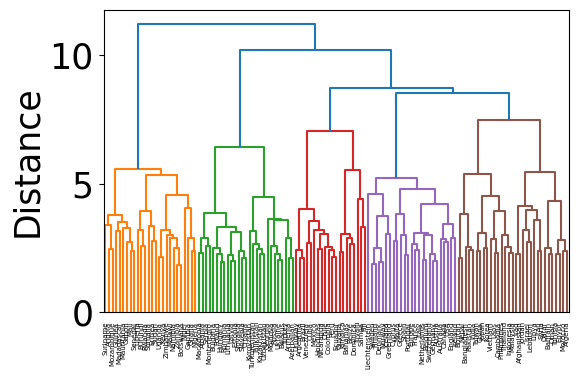

In [95]:
# 68
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import scipy.spatial.distance


D = scipy.spatial.distance.pdist(words, 'euclidean')
# Ward's Method
Z = scipy.cluster.hierarchy.linkage(D, 'ward')
fig, ax = plt.subplots(dpi=100)
dn = scipy.cluster.hierarchy.dendrogram(Z, labels=list(countries), ax=ax)
ax.set_ylabel("Distance")
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


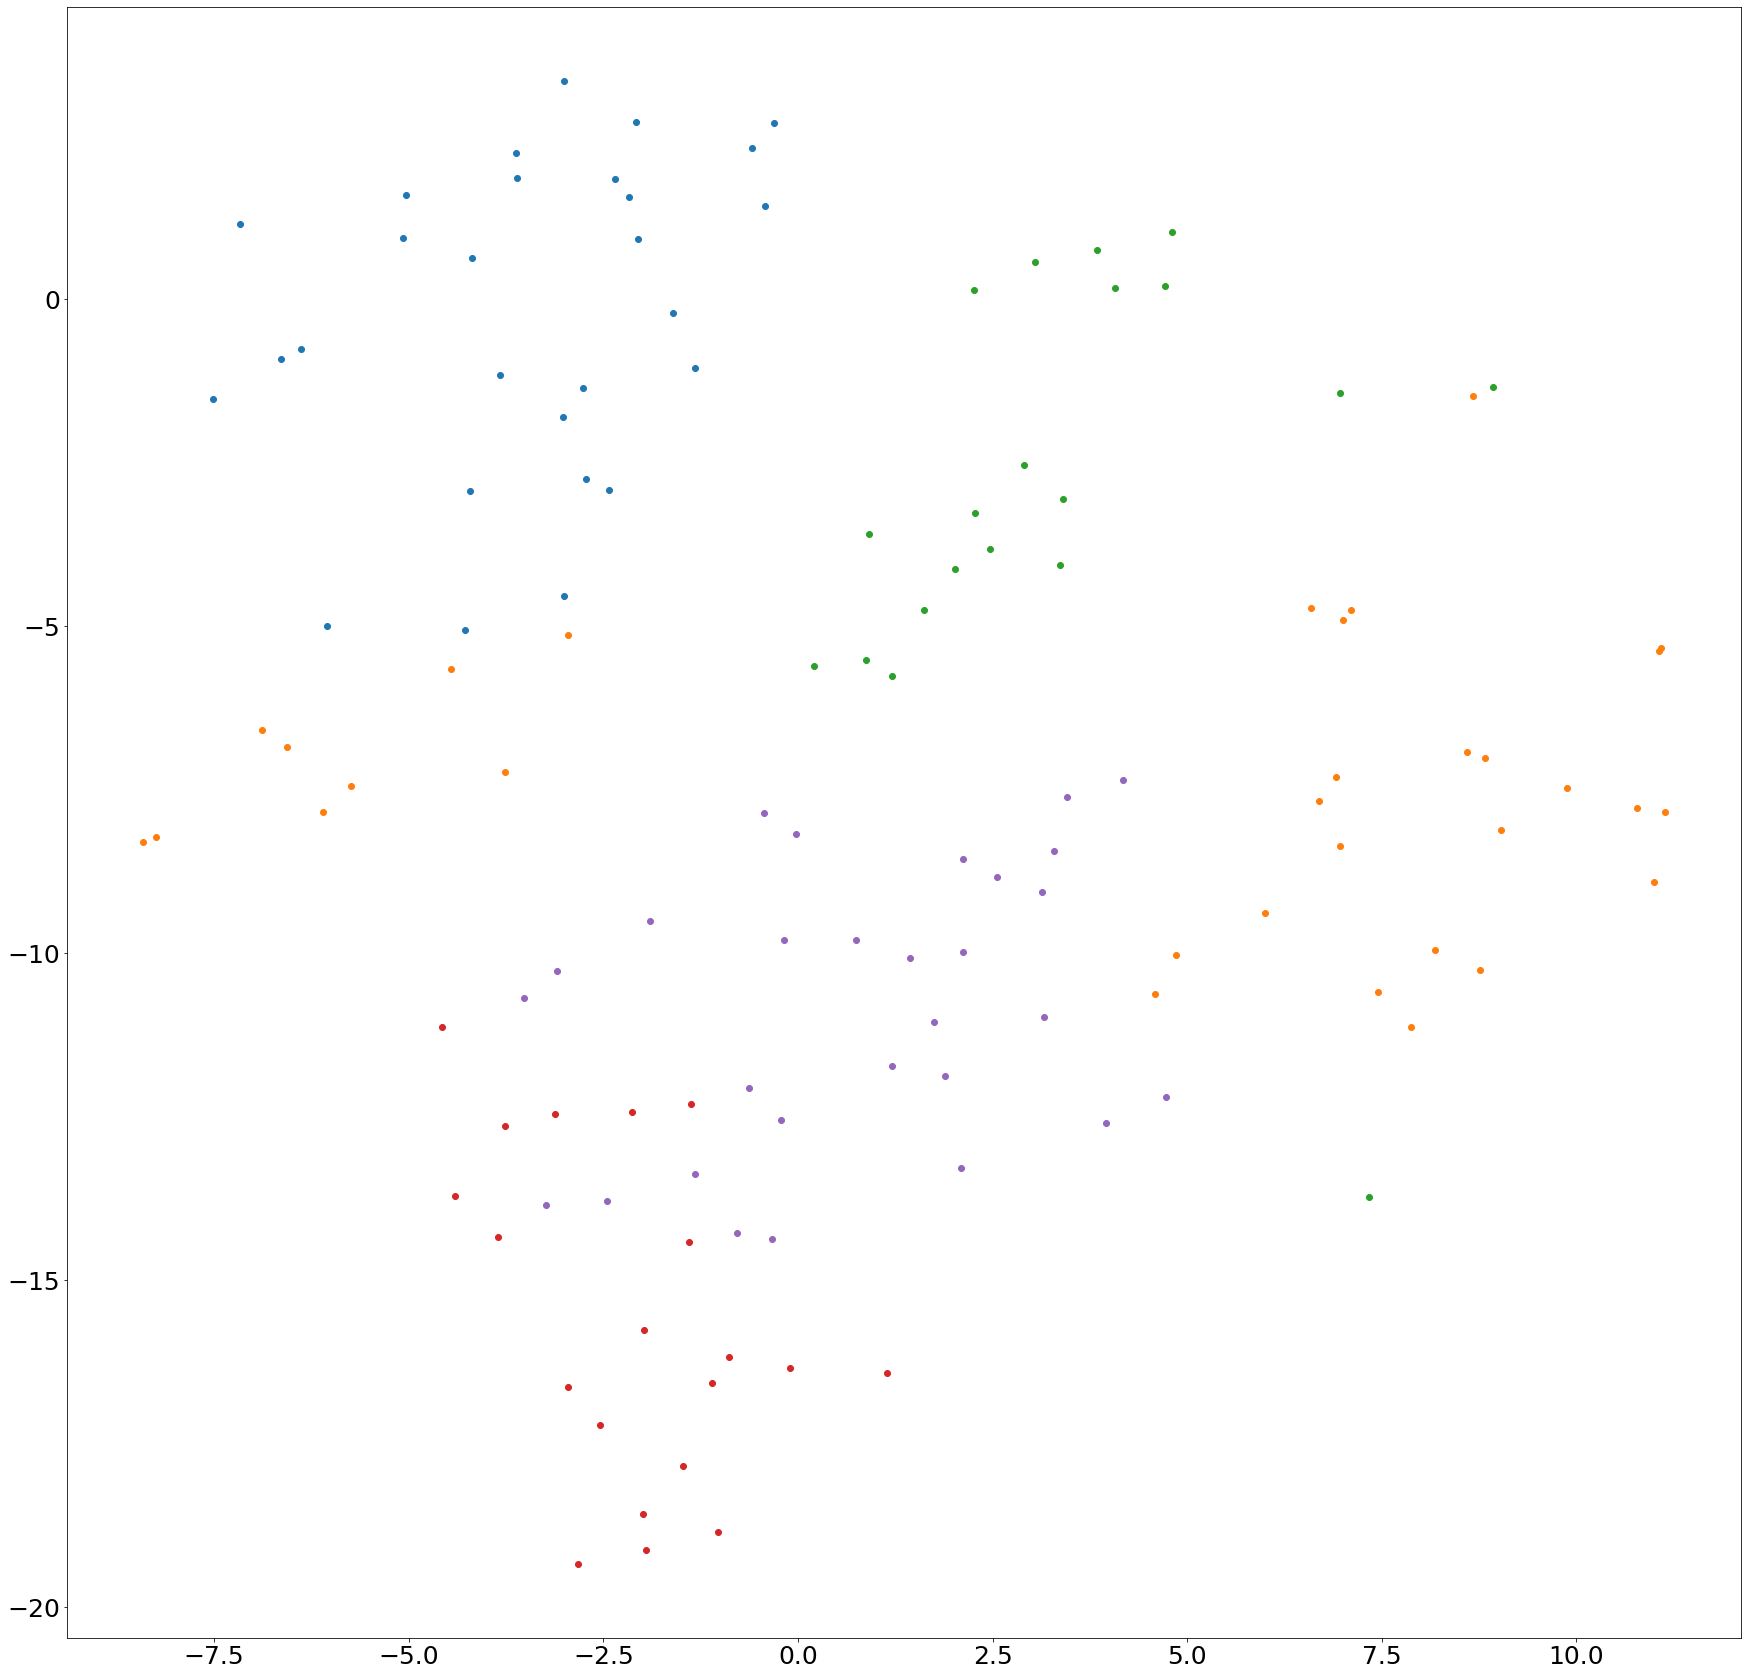

In [101]:
# 69
import pandas as pd
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)

X_embedded = tsne.fit_transform(words)
ddf = pd.DataFrame(X_embedded, columns = ['col1', 'col2'])

plt.figure(figsize = (30, 30))
for i , v, color in zip(range(len(countries)), countries, kmeans.labels_):
    plt.scatter(ddf['col1'][i],  
                ddf['col2'][i],
                label=v,
                color='C{}'.format(color)
                )


125
